Dataset Link: https://www.kaggle.com/datasets/yasserh/bmidataset

In [41]:
# load dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Load DataSet

In [20]:
# load dataset and check first few rows of data
bmi_data = pd.read_csv('bmi.csv')
bmi_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [21]:
# check basic information 
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [22]:
# convert gender to binary values
bmi_data['Gender'] = bmi_data['Gender'].map({'Male':0, 'Female':1})
bmi_data.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


## Detecting Multicollinearity

### Variance Inflation Factor (VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = bmi_data[['Gender', 'Height', 'Weight', 'Index']]

# create an empty dataframe 
vif = pd.DataFrame()
# copy all the features of X in vif dataframe
vif["features"] = X.columns
# calculate VIF for all the variables
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,VIF Factor,features
0,2.031010,Gender
1,11.941301,Height
2,40.024880,Weight
3,25.143752,Index


### Correlation Matrix

In [35]:
# calculate correlation values
correlation_matrix = bmi_data.corr()

correlation_matrix

,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


### Heatmaps

Text(0.5, 1.0, 'Correlation Matrix')

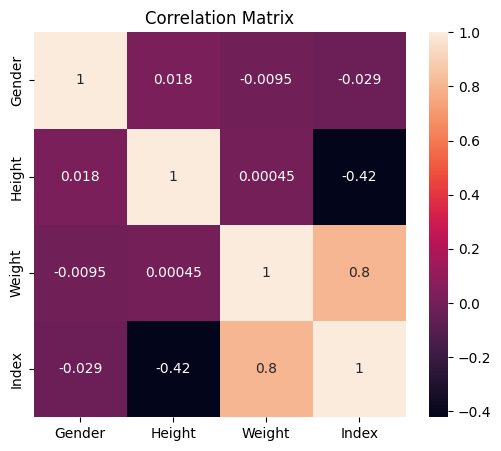

In [36]:
# set figure size 
plt.figure(figsize=(6,5))
# plot correlation matrix
sns.heatmap(correlation_matrix, annot=True)
# set the title
plt.title('Correlation Matrix')

### Clustermaps

Text(0.5, 1.0, 'Correlation Matrix')

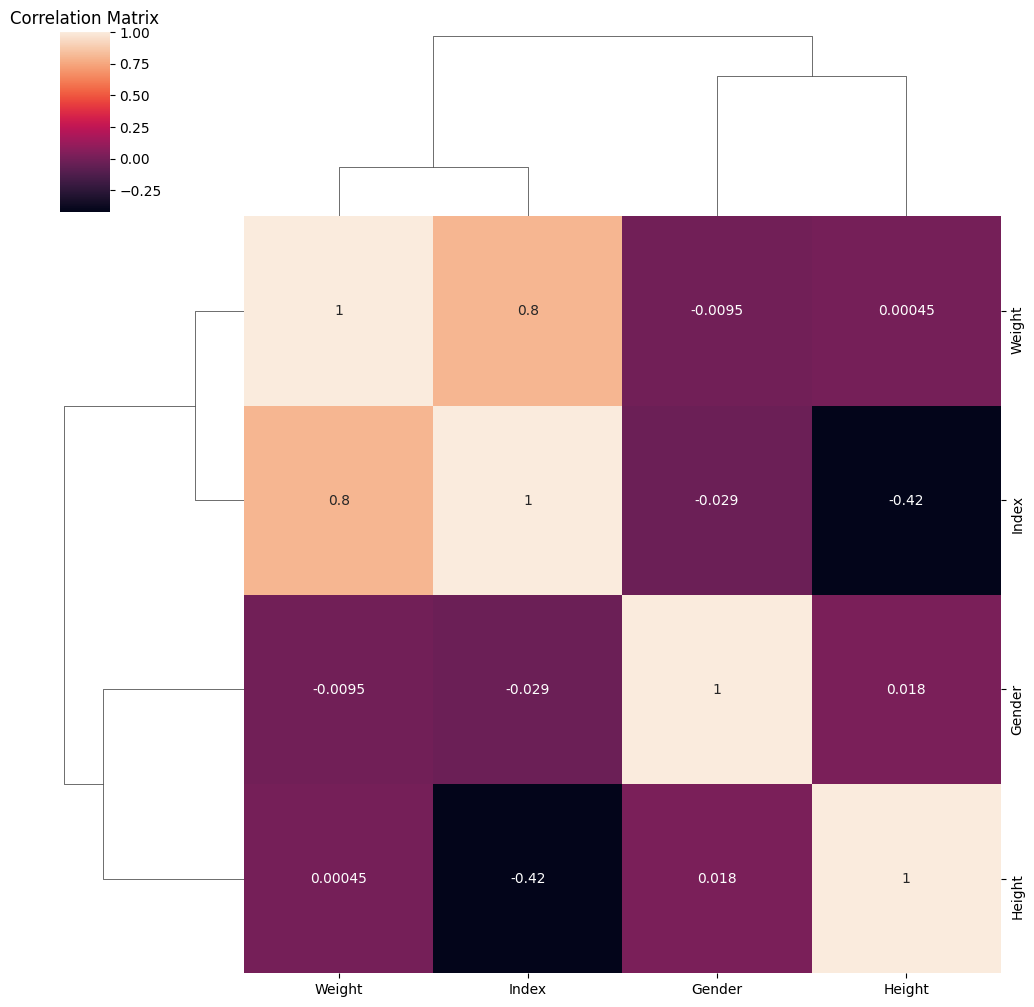

In [74]:
# plot correlation matrix
sns.clustermap(correlation_matrix, annot=True)
# set plot title 
plt.title('Correlation Matrix')

### Conditional Index

In [71]:
# Calculate the correlation matrix
correlation_matrix = bmi_data.corr()

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Calculate the condition index
condition_index = np.sqrt(max(eigenvalues) / eigenvalues)

print(f"Condition Index: {condition_index}")

Condition Index: [1.         4.57815295 1.38995613 1.37439993]


In [72]:
correlation_matrix

,Gender,Height,Weight,Index
Gender,1.000000,0.017677,-0.009523,-0.028786
Height,0.017677,1.000000,0.000446,-0.422223
Weight,-0.009523,0.000446,1.000000,0.804569
Index,-0.028786,-0.422223,0.804569,1.000000


### Eigenvalues

In [58]:
# Calculate the correlation matrix
correlation_matrix = bmi_data.corr()

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(correlation_matrix)

eigenvalues

array([1.90957868, 0.09110809, 0.98840599, 1.01090724])

## Remedying Multicollinearity

### Dropping Redundant Variables

In [62]:
# Remove highly correlated independent variables
bmi_data_2 = bmi_data.drop(['Index', 'Weight'], axis=1)

# calculate VIF 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(bmi_data_2.values, i) for i in range(bmi_data_2.shape[1])]
vif["features"] = bmi_data_2.columns
vif

,VIF Factor,features
0,2.028417,Gender
1,2.028417,Height


### Principal Component Analysis (PCA)

In [66]:
from sklearn.decomposition import PCA

# Use PCA to combine highly correlated independent variables
pca = PCA(n_components=1)

# create a copy of original data 
data = bmi_data.copy()

# compute PCA for correlated columns
data['pca'] = pca.fit_transform(bmi_data[['Index', 'Weight']])

# drop the correlated columns 
data = data.drop(['Index', 'Weight'], axis=1)

data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Gender,Height,pca
0,0,174,9.985846
1,0,189,19.048081
2,1,185,-4.006217
3,1,195,2.024050
4,0,149,44.999671
...,...,...,...
495,1,150,-47.015506
496,1,184,-14.999980
497,1,141,-30.025145
498,0,150,10.951610


In [67]:
# calculate VIF 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif

,VIF Factor,features
0,2.028601,Gender
1,2.028510,Height
2,1.000090,pca


### Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

# create dependent and independent variables
X = bmi_data.drop('Index', axis=1)
y = bmi_data['Index']

# Use Ridge regression to remedy multicollinearity
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

Ridge(alpha=0.1)